In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("scaled_average_daily_data.csv")  # Replace with your actual file path
df['time'] = pd.to_datetime(df['time'])  # Ensure time is in datetime format
df.set_index('time', inplace=True)  # Set the date column as the index

In [3]:
predictions = []
window_size = 30  # Define the window size

In [4]:
for i in range(window_size, len(df)):
    train_data = df['P'].iloc[i-window_size:i]  # Get the last 30 days of data
    model = ARIMA(train_data, order=(1, 1, 1))  # Specify your ARIMA order
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)  # Predict the next value
    predictions.append(forecast[0])  # Store the prediction


/Users/tejaswinithota/Desktop/solar_forecasting/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tejaswinithota/Desktop/solar_forecasting/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tejaswinithota/Desktop/solar_forecasting/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/r9/ld6l7sg96rn5bb8nz9j2dx580000gn/T/ipykernel_60240/2047096829.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

In [5]:
predictions_index = df.index[window_size:]  # Align the index for predictions
predictions_df = pd.DataFrame(predictions, index=predictions_index, columns=['Predicted Power'])

/var/folders/r9/ld6l7sg96rn5bb8nz9j2dx580000gn/T/ipykernel_60240/306926879.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start=df.index[0], end=df.index[-1], freq='M'))  # Show ticks for each month


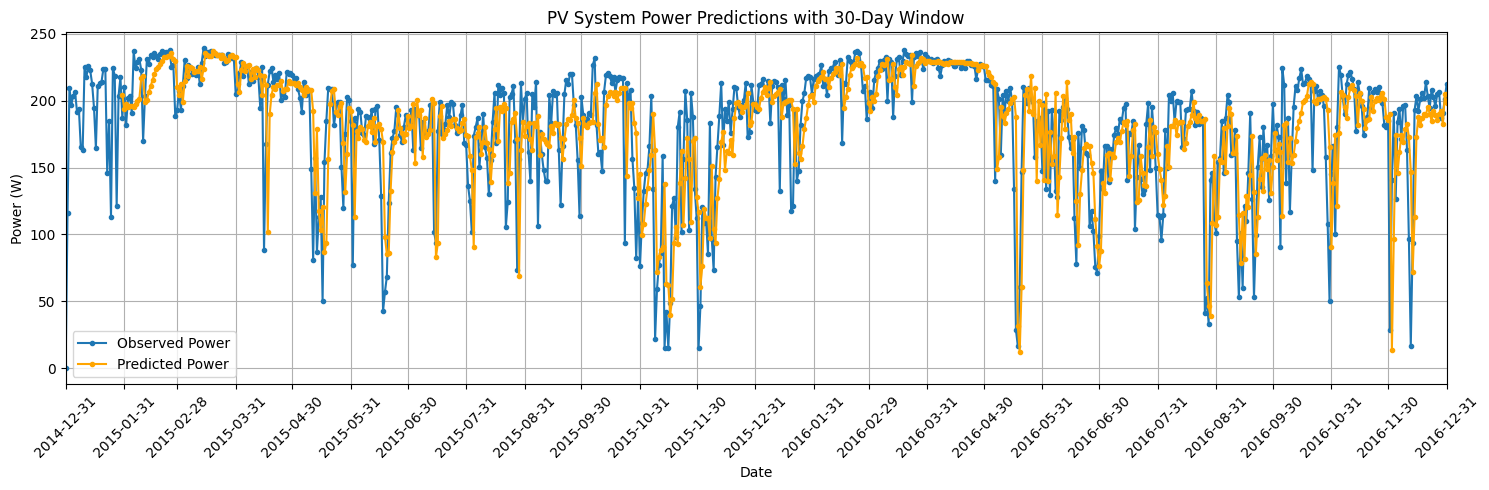

In [7]:
# Plot the observed and predicted values
plt.figure(figsize=(15, 5))
plt.plot(df['P'], label='Observed Power', marker='o', markersize=3)
plt.plot(predictions_df['Predicted Power'], label='Predicted Power', marker='o', color='orange', markersize=3)

# Setting the title and labels
plt.title('PV System Power Predictions with 30-Day Window')
plt.xlabel('Date')
plt.ylabel('Power (W)')

# Adjusting x-axis limits for clarity
plt.xlim(df.index[0], df.index[-1])  # Set x-limits to the entire range of the dataset

# Improve x-tick labels
plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=df.index[0], end=df.index[-1], freq='M'))  # Show ticks for each month

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


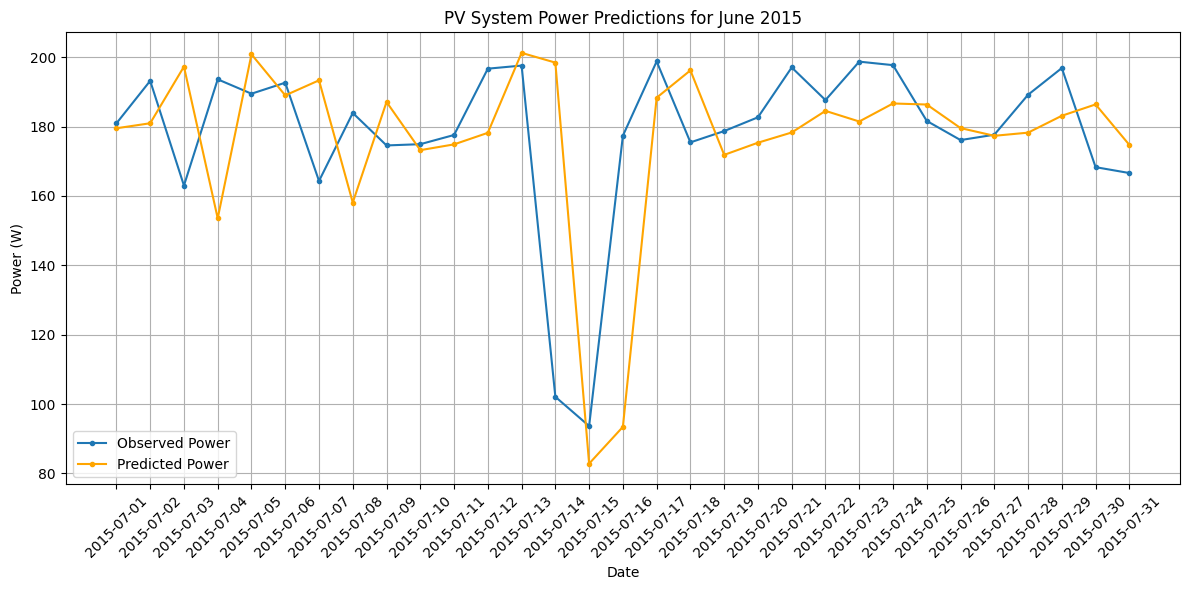

            Predicted Power
time                       
2015-07-27       177.351157
2015-07-28       178.258367
2015-07-29       183.130599
2015-07-30       186.402677
2015-07-31       174.727140


In [16]:
jan_2015_start = '2015-07-01'
jan_2015_end = '2015-07-31'
jan_observed = df[jan_2015_start:jan_2015_end]
jan_predictions = predictions_df[jan_2015_start:jan_2015_end]

# Plot the observed and predicted values for January 2015
plt.figure(figsize=(12, 6))
plt.plot(jan_observed['P'], label='Observed Power', marker='o', markersize=3)
plt.plot(jan_predictions['Predicted Power'], label='Predicted Power', marker='o', color='orange', markersize=3)

# Setting the title and labels
plt.title('PV System Power Predictions for June 2015')
plt.xlabel('Date')
plt.ylabel('Power (W)')

# Improve x-tick labels
plt.xticks(rotation=45)
plt.xticks(jan_observed.index)  # Show ticks for observed dates

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Optional: Print the last few predictions for January
print(jan_predictions.tail())  # Display the last few predicted values for January